# Performance/verification of a test

Import packages

In [1]:
import mallows_kendall as mk
import numpy as np
import itertools as it
import scipy as sp
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy.stats import rankdata
from scipy.stats import norm

### The C++ load and verification part

Compile C++ codes if necessary

In [2]:
# Compilation
#import os
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -fPIC  -Wall -g -O2  -c rankDepth.cpp -o rankDepth.o')
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -o rankDepth.so rankDepth.o')
# Restart the kernel after this line

Import (and test) the dynamic library

In [3]:
# Import and Test 1
from ctypes import *
cdll.LoadLibrary('rankDepth.so')
libc = CDLL('rankDepth.so')
libc.testFunc()

43

In [4]:
# Test 2
val = np.array([5.1])
obj = np.array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1])
n = 10
outp = np.array([1.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
res2 = libc.testFuncCmp(c_void_p(val.ctypes.data),
                       c_void_p(obj.ctypes.data),
                       c_int(n),
                       c_void_p(outp.ctypes.data))
print(res2)
print(outp)

0
[  1.1   0.    0.    0.    0.    0.    0.    0.    0.  142. ]


Depth-calculating Python function

In [5]:
def qrdepth(objects, data):
    '''
    The function to calculate the qr-depths
    '''
    depths = np.zeros(objects.shape[0])
    for i in range(objects.shape[0]):
        for j in range(data.shape[0]):
            depths[i] += (mk.max_dist(objects.shape[1]) - mk.distance(objects[i,:], data[j,:])) / mk.max_dist(objects.shape[1])
        depths[i] /= data.shape[0]
    return depths

### Mallows model 1

In [6]:
# Model 1: Mallows-Kendal location-shift
def MallowsDiff1(n = 10, m1 = 550, m2 = 50, diff = 0):
    theta1 = 1
    theta2 = 1
    cons1 = np.random.permutation(n)
    empDist1 = mk.sample(m = m1, n = n, theta = theta1, phi = None, s0 = cons1)
    cons2 = np.array(cons1)
    tmpWhere1 = np.where(cons1 == 0)
    tmpWhere2 = np.where(cons1 == diff)
    cons2[tmpWhere1] = diff
    cons2[tmpWhere2] = 0
    empDist2 = mk.sample(m = m2, n = n, theta = theta2, phi = None, s0 = cons2)
    return empDist1, empDist2, cons1, cons2

Testing for the Plackett-Luce model

In [7]:
np.random.seed(1)
empDist1, empDist2, cons1, cons2 = MallowsDiff1(10, 550, 50, 3)
print(empDist1.shape)
print(empDist2.shape)
print(cons1)
print(cons2)
print(mk.distance(cons2, cons1))

(550, 10)
(50, 10)
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 3 0 1 7 8 5]
5


### Main loop

[0 1 2 3 4 5 6 7 8 9]
Scale value equals 0
Iteration 0
Plotting DD-plot
Performing the test
Calculating the p-value
2508.0
0.4533527891309418
Iteration 1
Plotting DD-plot
Performing the test
Calculating the p-value
2449.0
0.3001635059741667
Iteration 2
Plotting DD-plot
Performing the test
Calculating the p-value
2486.5
0.39534602133525387
Iteration 3
Plotting DD-plot
Performing the test
Calculating the p-value
2570.0
0.37819611098323314
Iteration 4
Plotting DD-plot
Performing the test
Calculating the p-value
2355.0
0.12060869021595205
Iteration 5
Plotting DD-plot
Performing the test
Calculating the p-value
2764.5
0.04936215539623612
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
2495.0
0.41807732821092153
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
2565.5
0.3900457850249296
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
2438.5
0.27548226610362675
Iteration 9
Plotting DD-plot
Performing the test
Calculating

Performing the test
Calculating the p-value
2400.0
0.19441874875738413
Iteration 82
Plotting DD-plot
Performing the test
Calculating the p-value
2272.0
0.04056765162027301
Iteration 83
Plotting DD-plot
Performing the test
Calculating the p-value
2627.5
0.23990240460084722
Iteration 84
Plotting DD-plot
Performing the test
Calculating the p-value
2609.0
0.2812673038334683
Iteration 85
Plotting DD-plot
Performing the test
Calculating the p-value
2480.5
0.37950732512632696
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
2364.5
0.13426414716290125
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
2579.0
0.3548473035032652
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
2611.5
0.2754822661036267
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
2538.5
0.4629253383742483
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
2640.5
0.21294738152266257
Iteration 91
Plotting DD

Performing the test
Calculating the p-value
2624.5
0.24637702456907495
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
2639.5
0.21495596280960405
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
2849.5
0.012641714256948267
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
2496.0
0.4207712706208619
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
2777.5
0.040869008264537765
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
2597.0
0.30982197314899074
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
2782.5
0.0379358502164473
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
2573.5
0.3690576327234494
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
2407.0
0.20797410628221197
Iteration 72
Plotting DD-plot
Performing the test
Calculating the p-value
2710.0
0.10109151271000749
Iteration 73
Plotting

Performing the test
Calculating the p-value
2975.5
0.0009492555941681413
Iteration 45
Plotting DD-plot
Performing the test
Calculating the p-value
2992.5
0.0006345860914134249
Iteration 46
Plotting DD-plot
Performing the test
Calculating the p-value
2974.5
0.0009716223999343132
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
2614.0
0.2697563765993476
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
3015.5
0.0003605629107338304
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
2833.5
0.01672070337476994
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
2814.5
0.022979979835892284
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
2985.0
0.0007591649177978166
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
3140.0
1.119097392032753e-05
Iteration 53
Plotting DD-plot
Performing the test
Calculating the p-value
2720.5
0.08887072369026017
Iteratio

Performing the test
Calculating the p-value
3445.5
1.1066414451477158e-10
Iteration 25
Plotting DD-plot
Performing the test
Calculating the p-value
3332.0
1.3235051943283338e-08
Iteration 26
Plotting DD-plot
Performing the test
Calculating the p-value
3273.5
1.2345897693055718e-07
Iteration 27
Plotting DD-plot
Performing the test
Calculating the p-value
3299.5
4.666246278262065e-08
Iteration 28
Plotting DD-plot
Performing the test
Calculating the p-value
3196.0
1.8661982124079657e-06
Iteration 29
Plotting DD-plot
Performing the test
Calculating the p-value
3284.0
8.365738513038679e-08
Iteration 30
Plotting DD-plot
Performing the test
Calculating the p-value
3338.5
1.0226664071133484e-08
Iteration 31
Plotting DD-plot
Performing the test
Calculating the p-value
3403.5
6.967836307936182e-10
Iteration 32
Plotting DD-plot
Performing the test
Calculating the p-value
3274.5
1.1899280638605347e-07
Iteration 33
Plotting DD-plot
Performing the test
Calculating the p-value
3388.5
1.31785826695818

Calculating the p-value
3511.5
5.203726338720571e-12
Iteration 4
Plotting DD-plot
Performing the test
Calculating the p-value
3367.5
3.1603596406526435e-09
Iteration 5
Plotting DD-plot
Performing the test
Calculating the p-value
3704.0
2.220446049250313e-16
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
3449.0
9.45822309361688e-11
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
3551.5
7.391864897954292e-13
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
3655.5
3.219646771412954e-15
Iteration 9
Plotting DD-plot
Performing the test
Calculating the p-value
3657.0
2.9976021664879227e-15
Iteration 10
Plotting DD-plot
Performing the test
Calculating the p-value
3648.5
4.773959005888173e-15
Iteration 11
Plotting DD-plot
Performing the test
Calculating the p-value
3418.0
3.7259995089300446e-10
Iteration 12
Plotting DD-plot
Performing the test
Calculating the p-value
3550.0
7.963629755636248e-13
Iteration 13
Plotting DD

Performing the test
Calculating the p-value
3730.5
0.0
Iteration 84
Plotting DD-plot
Performing the test
Calculating the p-value
3550.0
7.963629755636248e-13
Iteration 85
Plotting DD-plot
Performing the test
Calculating the p-value
3557.0
5.618838727627917e-13
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
3479.5
2.3498536450006213e-11
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
3635.0
9.880984919163893e-15
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
3604.0
5.0959236830294685e-14
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
3653.5
3.6637359812630166e-15
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
3441.5
1.32325705948233e-10
Iteration 91
Plotting DD-plot
Performing the test
Calculating the p-value
3470.5
3.5600189463025345e-11
Iteration 92
Plotting DD-plot
Performing the test
Calculating the p-value
3659.5
2.6645352591003757e-15
Iteration 93
P

Performing the test
Calculating the p-value
3759.0
0.0
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
3712.0
1.1102230246251565e-16
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
3740.0
0.0
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
3693.0
4.440892098500626e-16
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
3753.5
0.0
Iteration 72
Plotting DD-plot
Performing the test
Calculating the p-value
3699.5
3.3306690738754696e-16
Iteration 73
Plotting DD-plot
Performing the test
Calculating the p-value
3742.5
0.0
Iteration 74
Plotting DD-plot
Performing the test
Calculating the p-value
3670.0
1.4432899320127035e-15
Iteration 75
Plotting DD-plot
Performing the test
Calculating the p-value
3714.5
1.1102230246251565e-16
Iteration 76
Plotting DD-plot
Performing the test
Calculating the p-value
3699.5
3.3306690738754696e-16
Iteration 77
Plotting DD-plot
Performing the test
Calculating the p

Performing the test
Calculating the p-value
3742.5
0.0
Iteration 59
Plotting DD-plot
Performing the test
Calculating the p-value
3745.0
0.0
Iteration 60
Plotting DD-plot
Performing the test
Calculating the p-value
3748.5
0.0
Iteration 61
Plotting DD-plot
Performing the test
Calculating the p-value
3730.0
0.0
Iteration 62
Plotting DD-plot
Performing the test
Calculating the p-value
3737.0
0.0
Iteration 63
Plotting DD-plot
Performing the test
Calculating the p-value
3764.5
0.0
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
3764.5
0.0
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
3695.5
3.3306690738754696e-16
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
3761.5
0.0
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
3725.5
1.1102230246251565e-16
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
3753.5
0.0
Iteration 69
Plotting DD-plot
Performing the test
Calcula

Performing the test
Calculating the p-value
3761.0
0.0
Iteration 54
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 55
Plotting DD-plot
Performing the test
Calculating the p-value
3774.5
0.0
Iteration 56
Plotting DD-plot
Performing the test
Calculating the p-value
3761.0
0.0
Iteration 57
Plotting DD-plot
Performing the test
Calculating the p-value
3772.5
0.0
Iteration 58
Plotting DD-plot
Performing the test
Calculating the p-value
3771.0
0.0
Iteration 59
Plotting DD-plot
Performing the test
Calculating the p-value
3774.0
0.0
Iteration 60
Plotting DD-plot
Performing the test
Calculating the p-value
3745.5
0.0
Iteration 61
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 62
Plotting DD-plot
Performing the test
Calculating the p-value
3771.0
0.0
Iteration 63
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
3771.0
0.0
Iteration 

Calculating the p-value
3745.5
0.0
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
3765.5
0.0
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
3745.5
0.0
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
3771.0
0.0
Iteration 53
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 54
Plotting DD-plot
Performing the test
Calculating the p-value
3773.5
0.0
Iteration 55
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 56
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 57
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 58
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 59
Plotting DD-plot
Performing the test
Calculating the p-value
3774.0
0.0
Iteration 60
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 61
Plotting DD-plot


Performing the test
Calculating the p-value
3775.0
0.0
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
3750.0
0.0
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
3773.0
0.0
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 53
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 54
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 55
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 56
Plotting DD-plot
Performing the test
Calculating the p-value
3774.5
0.0
Iteration 57
Plotting DD-plot
Performing the test
Calculating the p-value
3775.0
0.0
Iteration 

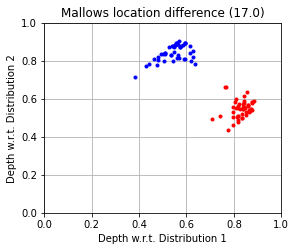

In [8]:
np.random.seed(1)
# Define data structures
n = 10
k = 100
diffs = np.array(list(range(n)))
print(diffs)
pValues = np.ones((len(diffs), k))
trueDiffs = -np.ones(len(diffs))
for iDf in range(len(diffs)):
    print("Scale value equals " + str(diffs[iDf]))
    for iRep in range(k):
        print("Iteration " + str(iRep))
        # Generate the data
        empDist1, empDist2, cons1, cons2 = MallowsDiff1(n, 550, 50, diffs[iDf])
        trueDiffs[iDf] = mk.distance(cons2, cons1)
        # Plot the DD-plot
        print("Plotting DD-plot")
        depths1 = np.transpose(np.array([qrdepth(empDist1[:50,:], empDist1[:50,:]), qrdepth(empDist1[:50,:], empDist2)]))
        depths2 = np.transpose(np.array([qrdepth(empDist2, empDist1[:50,:]), qrdepth(empDist2, empDist2)]))
        plt.close("all")
        plt.figure(1, figsize=(4.25, 3.5))
        plt.title("Mallows location difference (" + str(trueDiffs[iDf]) + ")")
        plt.plot(depths1[:,0], depths1[:,1], 'r.')
        plt.plot(depths2[:,0], depths2[:,1], 'b.')
        plt.xlabel("Depth w.r.t. Distribution 1")
        plt.ylabel("Depth w.r.t. Distribution 2")
        plt.ylim(0, 1)
        plt.xlim(0, 1)
        plt.grid()
        plt.savefig("pic-ddtest-n10-Mallows1-" + str(trueDiffs[iDf]) + ".pdf")
        print("Performing the test")
        # Calculate the depth statistics
        depthsTest1 = qrdepth(empDist1[:50,:], empDist1[50:,:])
        depthsTest2 = qrdepth(empDist2, empDist1[50:,:])
        depthsTestR = qrdepth(empDist1[50:,:], empDist1[50:,:])
        pDSmaller1 = np.zeros(50)
        for i in range(50):
            pDSmaller1[i] = np.mean(depthsTestR < depthsTest1[i])
        pDSmaller2 = np.zeros(50)
        for i in range(50):
            pDSmaller2[i] = np.mean(depthsTestR < depthsTest2[i])
        # Caculate the test statistics
        print("Calculating the p-value")
        nX = 50
        nY = 50
        W = np.sum(rankdata(np.concatenate((pDSmaller1, pDSmaller2)))[:50])
        print(W)
        Wmean = nY * (nX + nY + 1) / 2
        Wvar = nX * nY * (nX + nY + 1) / 12
        pr = norm.cdf(W, Wmean, np.sqrt(Wvar))
        pValues[iDf,iRep] = min(pr, 1 - pr)
        print(pValues[iDf,iRep])

In [9]:
np.savetxt("Results-testing-Mallows1.txt", pValues, delimiter = ",")
print(trueDiffs)
print(np.mean(pValues, axis = 1))

[ 0.  1.  3.  5.  7.  9. 11. 13. 15. 17.]
[2.76808408e-01 2.08928792e-01 2.37177582e-02 6.62671878e-06
 2.43444991e-10 1.97175609e-14 1.88737914e-17 0.00000000e+00
 2.22044605e-18 2.22044605e-18]


Plot the average p-values

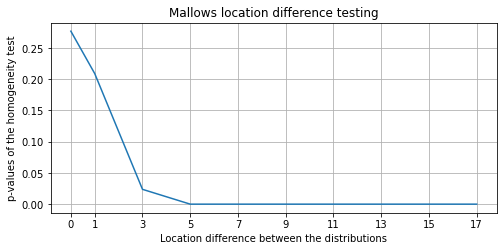

In [12]:
plt.close("all")
plt.figure(1, figsize=(8, 3.5))
plt.title("Mallows location difference testing")
plt.plot(trueDiffs, np.mean(pValues, axis = 1), '-')
plt.xlabel("Location difference between the distributions")
plt.ylabel("p-values of the homogeneity test")
plt.xticks(trueDiffs)
plt.grid()
plt.savefig("pic-ptest-n10-Mallows1.pdf")